In [62]:
import numpy as np
import pandas as pd
import copy

In [63]:
data = pd.read_csv('PRSA_data.csv')
pm25 = data.loc[:,"pm2.5"].values.reshape(-1,1) #sklearn当中特征矩阵必须是二维

from sklearn.impute import SimpleImputer

In [64]:
# 使用均值填补缺失数据(数值型数据)
data_mean = copy.deepcopy(data)

# data_mean.isna().sum()
pm25_mean = SimpleImputer()
pm25_mean = pm25_mean.fit_transform(pm25)

data_mean.loc[:,"pm2.5"] = pm25_mean

In [65]:
# 使用中位数进行填补
data_median = copy.deepcopy(data)

pm25_median = SimpleImputer(strategy="median") # 使用中位数填补

pm25_median = pm25_median.fit_transform(pm25)

data_median.loc[:,"pm2.5"] = pm25_median

In [66]:
# 使用0进行填补
data_zero = copy.deepcopy(data)

pm25_zero = SimpleImputer(strategy="constant",fill_value=0) # 使用中位数填补

pm25_zero = pm25_zero.fit_transform(pm25)

data_zero.loc[:,"pm2.5"] = pm25_zero

In [67]:
# 使用众数进行填补
data_mode = copy.deepcopy(data)

pm25_mode = SimpleImputer(strategy="most_frequent") # 使用中位数填补

pm25_mode = pm25_mode.fit_transform(pm25)

data_mode.loc[:,"pm2.5"] = pm25_mode


In [68]:
# 使用KNN进行插值
from sklearn.impute import KNNImputer

data_knn = copy.deepcopy(data)

pm25_pd = data.loc[:,"pm2.5"]

pm25_knn = KNNImputer(n_neighbors=5)

pm25_knn = pm25_knn.fit_transform(pm25_pd.reset_index())

data_knn.loc[:,"pm2.5"] = pm25_knn[:,1]


In [ ]:
X_y = data.iloc[:, 5:]
y = data.iloc[:, 5]

In [ ]:
cbwd_one_hot = dict(zip(set(X_y['cbwd']), range(4)))
cbwd_one_hot_inverse = dict(zip(range(4), set(X_y['cbwd'])))

In [ ]:
# one hot encoding

import copy

X_cbwd = copy.deepcopy(X_y['cbwd'].values)
X_cbwd_new = np.asarray(X_cbwd)
for i, item in enumerate(X_cbwd):
    X_cbwd_new[i] = cbwd_one_hot[item]

X_y['cbwd'] = X_cbwd_new

In [ ]:
import numpy as np
import pandas as pd

# 查看缺失情况
missing = X_missing.isna().sum()



In [1]:
import pandas as pd
from scipy.interpolate import griddata
import numpy as np
import copy

data = pd.read_csv('PRSA_data.csv')
data=data.fillna(value=np.nan)

cbwd_one_hot = dict(zip(set(data['cbwd']), range(4)))
cbwd_one_hot_inverse = dict(zip(range(4), set(data['cbwd'])))

X_cbwd = copy.deepcopy(data['cbwd'].values)
X_cbwd_new = np.asarray(X_cbwd)
for i, item in enumerate(X_cbwd):
    X_cbwd_new[i] = cbwd_one_hot[item]

data['cbwd'] = X_cbwd_new

In [2]:
DEWP_min, DEWP_max = min(data.DEWP), max(data.DEWP)
TEMP_min, TEMP_max = min(data.TEMP), max(data.TEMP)
PRES_min, PRES_max = min(data.PRES), max(data.PRES)
cbwd_min, cbwd_max = min(data.cbwd), max(data.cbwd)
Iws_min, Iws_max = min(data.Iws), max(data.Iws)
Is_min, Is_max = min(data.Is), max(data.Is)
Ir_min, Ir_max = min(data.Ir), max(data.Ir)

In [3]:
grid_TEMP, grid_PRES = np.mgrid[TEMP_min:TEMP_max, PRES_min:PRES_max]

In [4]:
pm25_data = data.loc[:,"pm2.5"].values.reshape(-1,1)
nan_index,_ = np.where(np.isnan(pm25_data))
non_nan_index,_=np.where(~np.isnan(pm25_data))

In [7]:
points=data.loc[non_nan_index,['TEMP','PRES']].values
values=data.values[non_nan_index,5]
grid_z = griddata(points, values, (grid_TEMP, grid_PRES), method='linear')

C:\Users\csw200108\AppData\Local\Temp\ipykernel_20104\1503982848.py:6: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf=ax.plot_surface(grid_TEMP,grid_PRES,grid_z,cmap=cm.coolwarm)


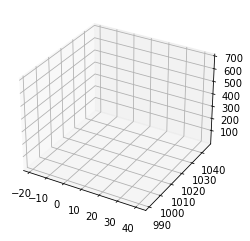

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig=plt.figure()
ax=fig.gca(projection='3d')
surf=ax.plot_surface(grid_TEMP,grid_PRES,grid_z,cmap=cm.coolwarm)
plt.show()

In [9]:
from scipy import interpolate

x=data.DEWP.values[non_nan_index]
y=data['pm2.5'].values[non_nan_index]
f = interpolate.interp1d(x, y)
y_new=f(data.DEWP.values[non_nan_index])